# Import data

In [140]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)


In [141]:
ratings.head()


,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


# Ploting

In [143]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='rating', ylabel='Count'>

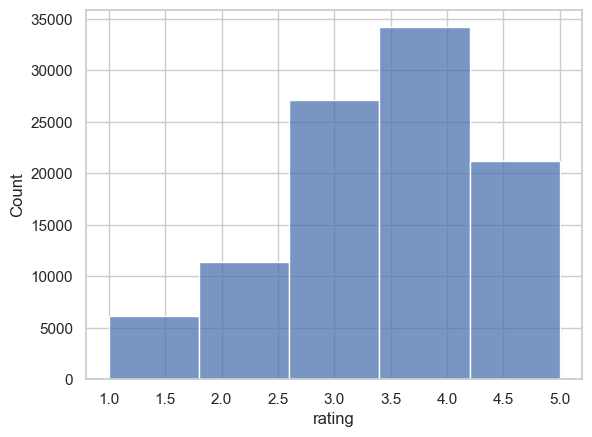

In [144]:
sns.histplot(data=ratings, x="rating",bins = 5)

In [152]:
# ratings['date'] = ratings.title.str.extract('(\d+)')
ratings['date'] = ratings.title.str[-6:]
ratings['date'] = ratings.date.str.extract('(\d+)')
ratings['date'] = ratings['date'].astype(float) 
ratings_date = ratings.copy()

In [153]:
ratings_date

,movie_id,title,user_id,rating,date
0,1,Toy Story (1995),308,4,1995.0
1,1,Toy Story (1995),287,5,1995.0
2,1,Toy Story (1995),148,4,1995.0
3,1,Toy Story (1995),280,4,1995.0
4,1,Toy Story (1995),66,3,1995.0
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,1997.0
99999,1679,B. Monkey (1998),863,3,1998.0
100000,1680,Sliding Doors (1998),863,2,1998.0
100001,1681,You So Crazy (1994),896,3,1994.0


In [154]:
ratings_date= ratings_date.dropna()

In [155]:
ratings_date = ratings_date[ratings_date['date'] > 1000]

<AxesSubplot:xlabel='date', ylabel='Count'>

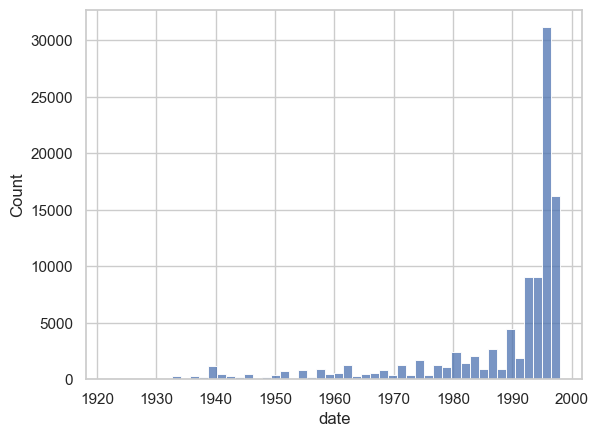

In [160]:
sns.histplot(data=ratings_date, x="date",bins = 50)

In [11]:
ratings.shape

(100003, 4)

In [14]:
df = ratings.groupby('title').agg({'user_id':'count'})

In [32]:
df = df.sort_values(by = 'user_id', ascending=False)

In [46]:
df= df.reset_index()

In [52]:
show_df = df.head(100)

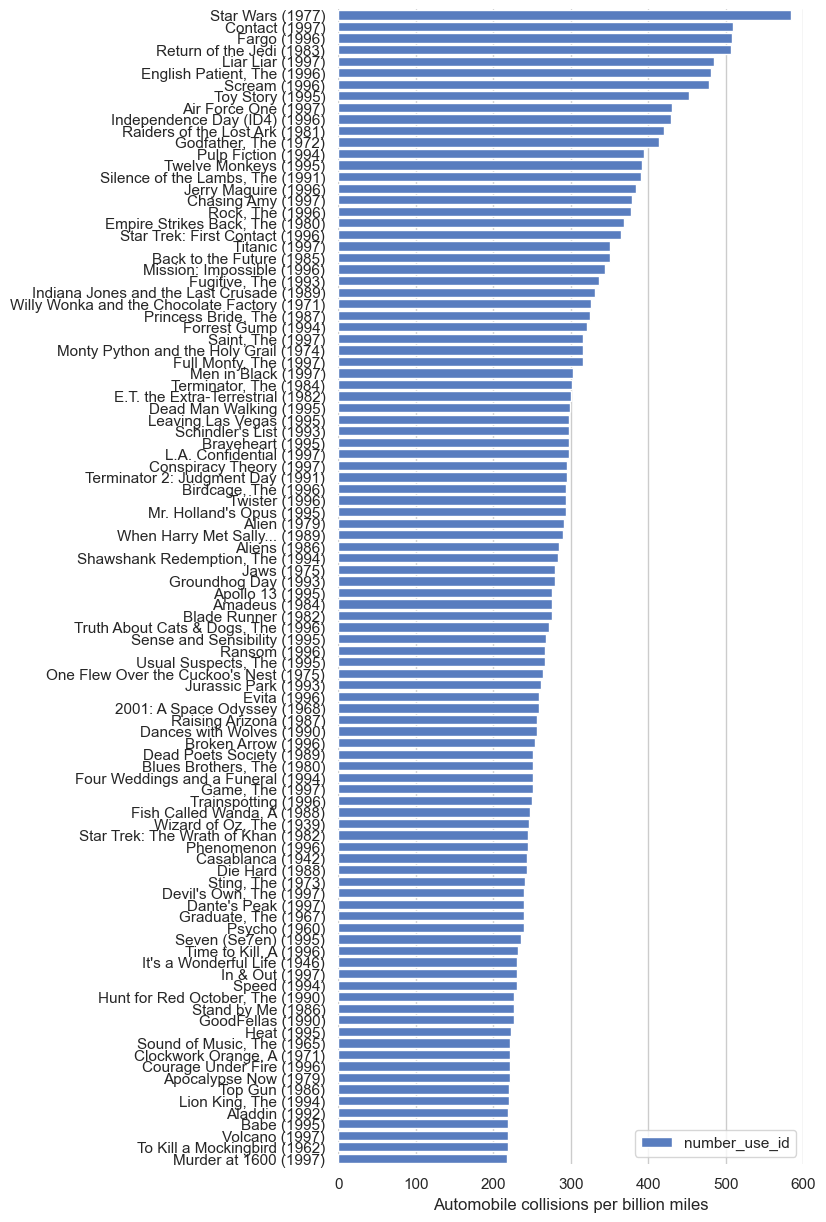

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="user_id", y="title", data=show_df ,
            label="number_use_id", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 600), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

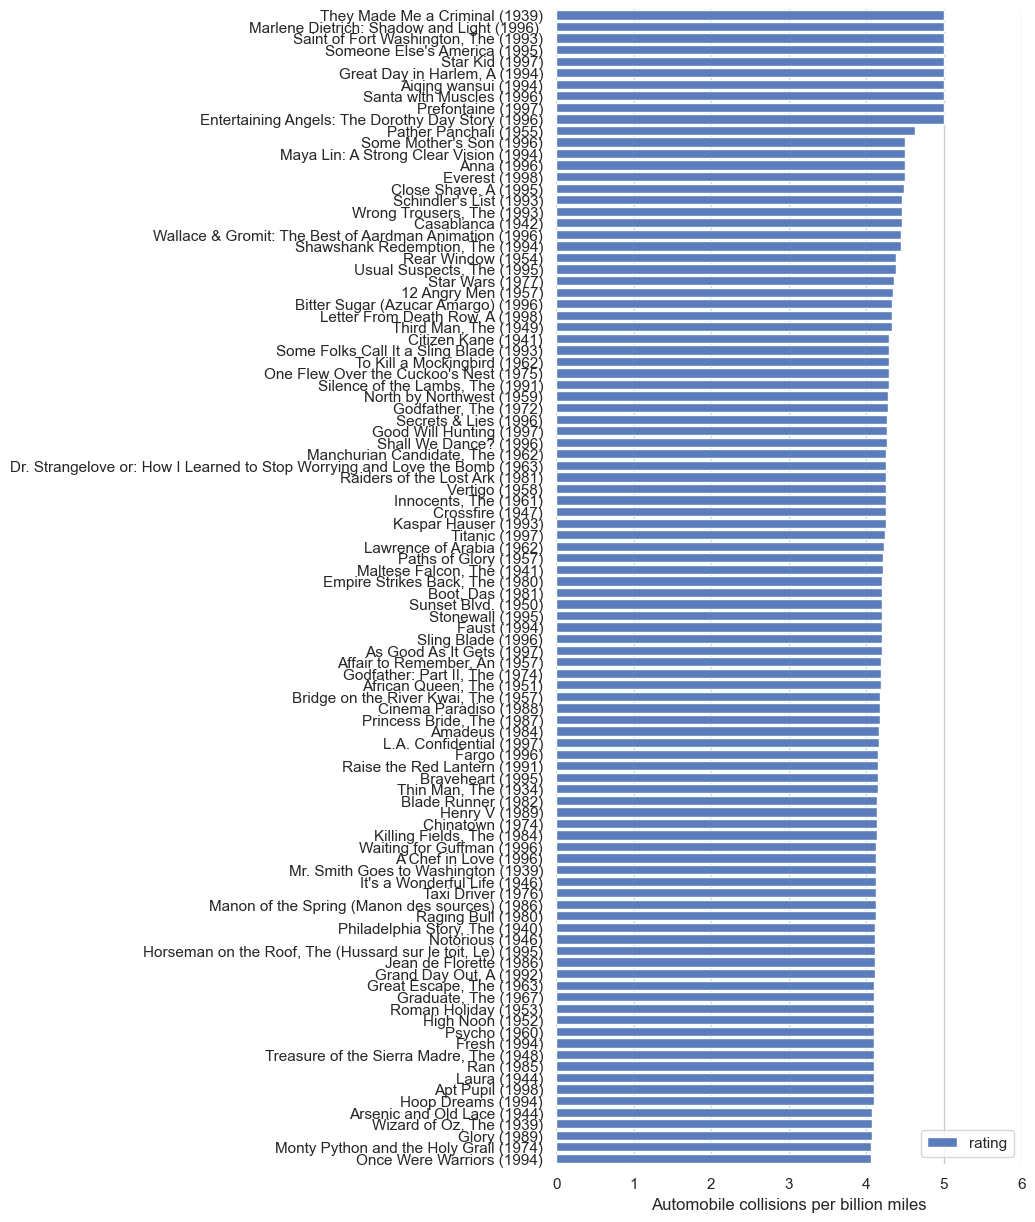

In [68]:
df2 = ratings.groupby('title').agg({'rating':'mean'})
df2 = df2.sort_values(by = 'rating', ascending=False)
df2= df2.reset_index()
show_df = df2.head(100)

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="rating", y="title", data=show_df ,
            label="rating", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,6), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# Generated metrix (pivot)

In [6]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Picking star war to find correlate movie

In [69]:
starWarsRatings = movieRatings['Star Wars (1977)']
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [161]:
similarMovies = movieRatings.corrwith(starWarsRatings)
similarMovies = similarMovies.dropna()
df = pd.DataFrame(similarMovies)
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [163]:
similarMovies.sort_values(ascending=False)

title
No Escape (1994)                          1.0
Man of the Year (1995)                    1.0
Hollow Reed (1996)                        1.0
Commandments (1997)                       1.0
Cosi (1996)                               1.0
                                         ... 
Theodore Rex (1995)                      -1.0
I Like It Like That (1994)               -1.0
Two Deaths (1995)                        -1.0
Roseanna's Grave (For Roseanna) (1997)   -1.0
Frankie Starlight (1995)                 -1.0
Length: 1410, dtype: float64

# Select size rating number more than 100

In [164]:
import numpy as np
movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [166]:
movieStats_plt = movieStats.copy()

In [174]:
movieStats_plt = movieStats_plt.reset_index()

In [189]:
movieStats_plt['size'] = movieStats_plt.rating['size']

In [197]:
movieStats_plt['mean'] = movieStats_plt.rating['mean']

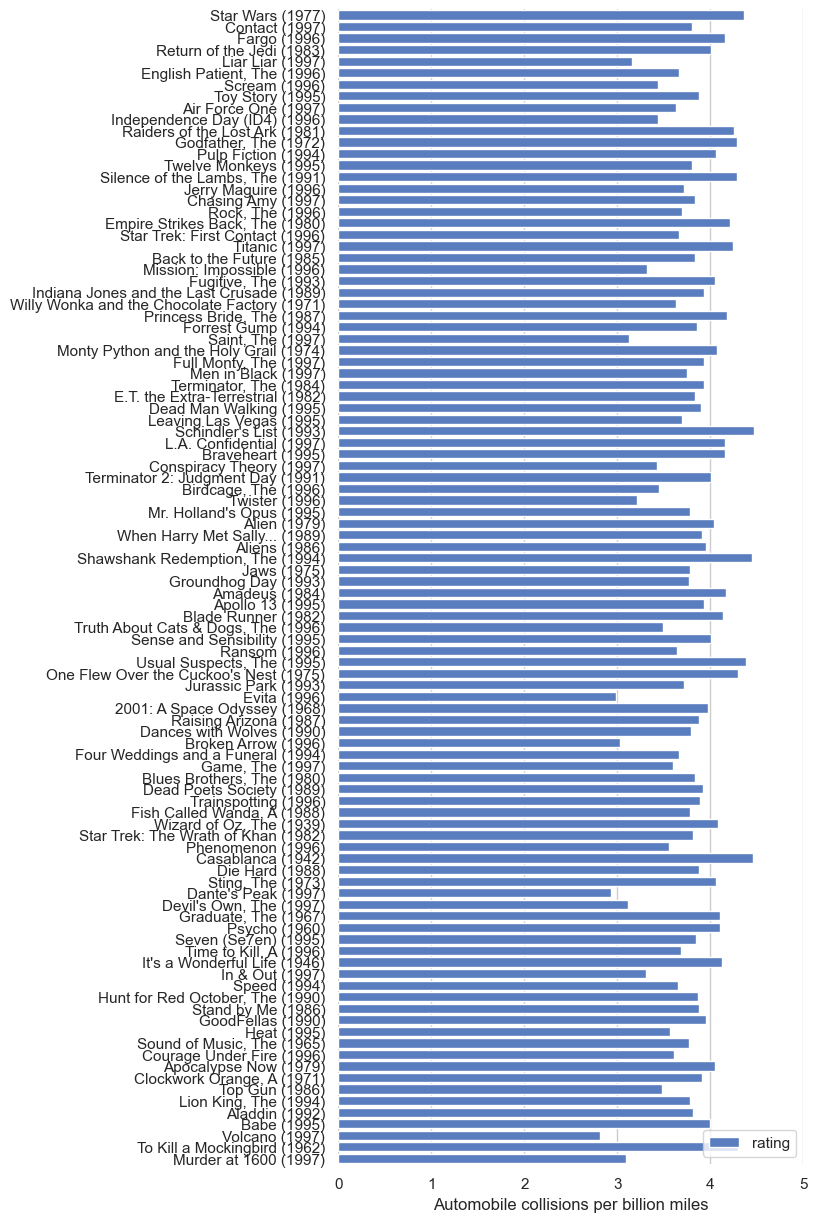

In [199]:
movieStats_plt = movieStats_plt.sort_values(by = 'size', ascending=False)
show_df = movieStats_plt.head(100)

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x='mean', y="title", data=show_df ,
            label="rating", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [200]:
popularMovies = movieStats['rating']['size'] >= 100
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          584  4.359589
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [201]:
df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [202]:
df.sort_values(['similarity'], ascending=False)[:15]

,"(rating, size)","(rating, mean)",similarity
title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729
